In [1]:
import pandas as pd, numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import string

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
data = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


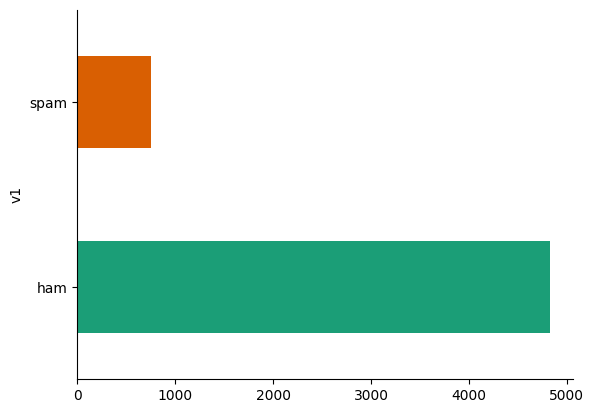

In [5]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
x = data['v2']
y = data['v1']

In [8]:
def preprocess(data):
  final_data=[]
  for i in range(len(data)):

    data[i] = data[i].lower()

    tokens = word_tokenize(data[i])

    tokens = [ token for token in tokens if token not in string.punctuation]

    stop_words = set(stopwords.words('english'))

    tokens = [token for token in tokens if token not in stop_words]

    final_data.append(" ".join(tokens))

  return final_data

x = preprocess(x)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [10]:
x_train[0:5]

['ducking chinchillas',
 "get cash together 'll text jason",
 'men like shorter ladies gaze eyes',
 "'s still working time also tried adding zeros savings checking lt gt",
 "well 'm gon na finish bath good ... fine night"]

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [33]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [34]:
y_pred=pd.Series(y_pred)

In [35]:
y_pred.value_counts()

ham     1720
spam     231
dtype: int64

In [38]:
input = "Congratulations! You've won a free vacation to Hawaii. Claim your prize now"

input = cv.transform([input]).toarray()
out = model.predict(input)

In [39]:
print(out)

['spam']
